# Title: Binary classification of subscriptions for direct marketing campaigns: A logistic regression & random forest approach
### Author: Georgios Spyrou (georgios.spyrou1@gmail.com)
### Completion Date: 04/08/2020

## Project Description

Purpose of this project is to analyze a dataset containing information about marketing campaigns that were conducted via phone calls from a Portuguese banking institution to their clients. Main goal of these campaigns was to attempt and persuade their clients to subscribe to a specific product (bank term deposit). At the end of each call the client was either ended up subscibing to the product (successful campaing) or not (unsuccessful campaing). 

Our main goal in this project is to create machine learning algorithms that are able to predict the probability of a client subscribing to the bank's product.

The dataset contains 41188 instances of calls to clients (rows) and 21 features (columns) describing certain aspects of the call. Please note that there are cases where the same client was contacted multiple times - something that practically doesn't affect our analysis as each call is being considered indipendent from another. If a client has been contacted multiple times is being captured in the features, as presented below:

### Variables

The predictor variables (features) contained in the dataset and that we will use in order to predict the probability that a client will subscribe for the product, can be divided into 5 sections:

1. Features describing the bank client:

    a. **age** <br>
    b. **job**: type of job (_e.g. 'admin', 'technician', 'unemployed', etc_) <br>
    c. **marital**: marital status (_'married', 'single', 'divorced', 'unknown'_) <br>
    d. **education**: education level (_'basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown','university.degree','illiterate'_) <br>
    e. **default**: has credit in default ? (_'no', 'unknown', 'yes'_) <br>
    f. **housing**: has housing loan ? (_'no', 'unknown', 'yes'_)<br>
    g. **loan**: has personal loan ? (_'no', 'unknown', 'yes'_)<br>
    <br>
2. Features related to the last contact of the current campaign:

    a. **contact**: contact communication type (_'telephone', 'cellular'_) <br>
    b. **month**: last contact month of year <br>
    c. **day_of_week**: last contact day of the week <br>
    d. **duration**: last contact duration, in seconds <br>
    <br>
3. Other features related to the campaign(s):

    a. **campaign**: # of contacts performed during this campaign and for this client <br>
    b. **pdays**: # of days that passed by after the client was last contacted from a previous campaign <br>
    c. **previous**: # of contacts performed before this campaign and for this client <br>
    d. **poutcome**: outcome of the previous marketing campaign (_'nonexistent', 'failure', 'success'_) <br>
    <br>   
4. Social and Economic features:

    a. **emp.var.rate**: employement variation rate - quarterly indicator <br>
    b. **cons.price.idx**: consumer price index - monthly indicator <br>
    c. **cons.conf.idx**: consumer confidence index - monthly indicator <br>
    d. **euribor3m**: euribor 3 month rate - daily indicator <br>
    e. **nr.employed**: # of employees - quarterly indicator <br>
      
Of course we can also observe the variable **subscribed** which is the target variable for our project, indicating if the client subscribed to the product (_'yes'_) or not (_'no'_).

Now that we got a brief understanding of what the project is about, what the variables in our dataset are and what is our main goal we can start with the main part of our analysis. In the first part of this project we will perform all the regular operations needed in pretty much any data science project, i.e. load the dataset into a dataframe, search for corrupt/inaccurate records & perform data cleaning operations and finally perform exploratoty data analysis to identify interesting patterns in the data that might be useful when creating the machine learning algorithms, as well as get to know the features better. 

## Part 1 - Data Import, Cleaning and Exploratory Data Analysis (EDA)

First step is to import the relevant libraries that we will use across the whole project, set the project directory where all files are located and load our dataset into a dataframe.

In [23]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



sns.set_style("dark")

#### Project set-up and data loading

In [7]:
# Location of the project folder and the dataset (csv file)
project_folder = r'C:\Users\george\Desktop\FCA_Project'

os.chdir(project_folder)

data_file_loc = os.path.join(project_folder, 'data set.csv')

bank_marketing_df = pd.read_csv(data_file_loc, sep=';', header=[0])

In [8]:
bank_marketing_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

We can observe that the last column of the dataset ('y') is our target variable which indicates if a client ended up subscribing to the product or not. The initial name from the dataset is not very self-explanatory so we will rename it to something more relevant.

In [9]:
bank_marketing_df.rename(columns={'y': 'subscribed'}, inplace=True)

#### Data Cleaning

In every data science project (and in general when working with data) before we perform any type of data analysis or create prediction models it's very important that we make sure that our dataset is "clean". When calling a dataset clean, we generally mean that we have handled any cases where we had missing values (the might come in the form of NULL if the value is missing or with other types like 'unknown'). Some other data cleaning techniques might include getting rid of duplicate rows as they do not add any value, if working with text check for mispelled words, etc.

In general the data cleaning steps are very important for every project, as we want to make sure that our dataset is in it's best shape before we build any model around it. That said, there is no specific steps that we need to take for data cleaning and it's something that the data analyst/scientist should adjust depending on the dataset that they are working with and the specific problem that they are trying to tackle.

In [10]:
# Check if the dataframe has duplicates and remove them
df_shape = bank_marketing_df.shape
print(f'There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset')

There are 41188 rows and 21 columns in the dataset


In [11]:
bank_marketing_df = bank_marketing_df.drop_duplicates()
df_shape = bank_marketing_df.shape
print(f'''There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset after removing duplicates''')

There are 41176 rows and 21 columns in the dataset after removing duplicates


Above we can see that we have removed 12 rows from the initial dataset as they were duplicates of other rows and they did not give us any additinal information that we didn't have already.

In [12]:
# Identify how many missing values we have per column
bank_marketing_df.isnull().sum(axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

Our check for missing values indicates that all of our rows/columns are fully populated (i.e. no NULL values). That said, this does not mean that we don't have any missing values in another format. For example - as we are going to see below - there are many cases where for specific columns we have values described as 'unknown' indicating that we do not know the value.

In [13]:
# There are many missing values in other forms like 'unknown'
unknown_cols = bank_marketing_df.isin(['unknown']).sum(axis=0)
unknown_cols[unknown_cols > 0]

job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

For the time being, we will leave these columns as they are and we won't proceed with imputation methods in order to infer what the values would be. This is something that we might want to do in future iterations of the project.

#### Exploratory Data Analysis

At first we can have a look at the distribution of our target variable ('subscribed') across the whole dataset, to identify any interesting patterns.

In [24]:
def visualizeCategoricalVar(input_df: pd.core.frame.DataFrame, col: str, hue: str, figsize=(10, 8)) -> None:
    """
    Plot the number of subscribed clients for a specified categorical column
    of a dataframe.

    Input:
    ----
        input_df: Dataframe that contains the dataset
        col: Column of the dataframe that will be used by the countplot
        hue: Column for which to split the dataset in terms of color
    Returns:
    ------
        Countplot of the specified variable
    """
    size = float(input_df.shape[0])

    plt.figure(figsize=figsize)
    ax = sns.countplot(x=col, data=input_df, hue=hue)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 4, '{:1.2f}%'.format(100 * height/size), ha="center")
    if hue is None:
        plt.title('Number of Subscribed Clients', fontweight='bold')
    else:
        plt.title(f'Number of Subscribed Clients per \'{col}\'', fontweight='bold')
    plt.grid(True, alpha=0.3, color='black')
    plt.legend(loc='best')
    plt.show()

No handles with labels found to put in legend.


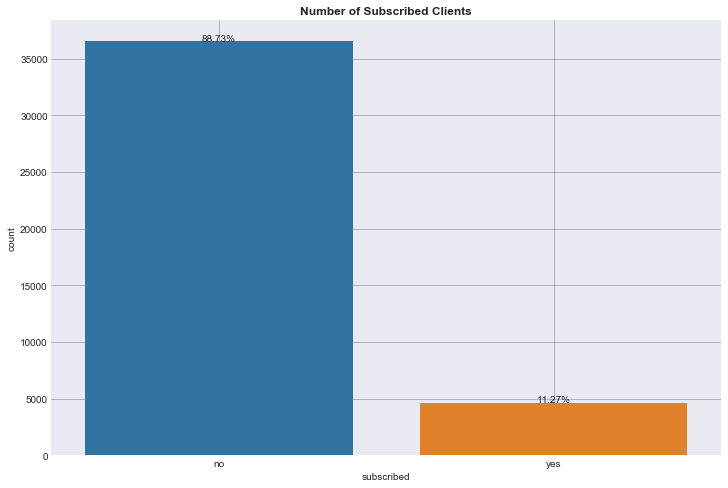

In [26]:
visualizeCategoricalVar(bank_marketing_df, col='subscribed', hue=None, figsize=(12, 8))